# 0. Dependencies

In [2]:
!pip install easyocr
!pip install imutils

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import easyocr
import imutils


# 1. Read in image, grayscale and blur


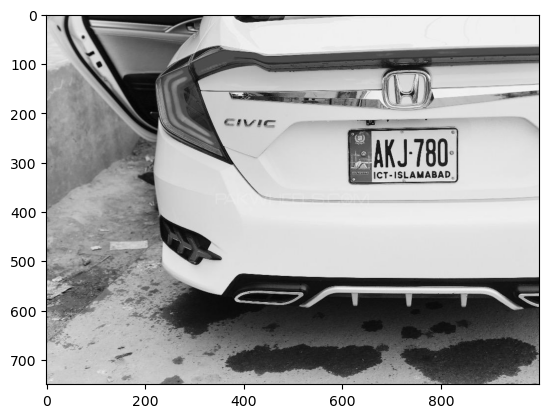

In [116]:
img=cv2.imread('civic2.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

# 2. Filter and find edges for localization


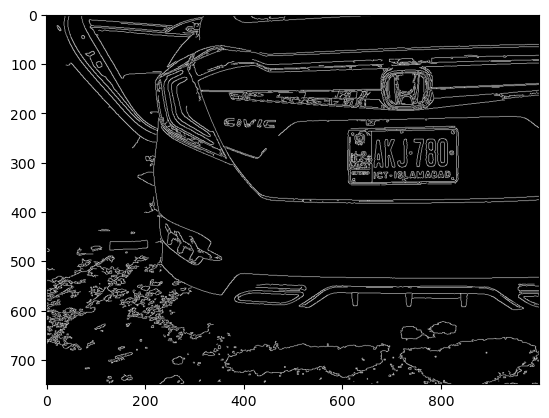

In [117]:
bfilter=cv2.bilateralFilter(gray,10,17,17) #noise reduction
edged=cv2.Canny(bfilter,30,200) # edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

# 3. Find contours and apply mask

In [118]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:14]

In [119]:
loc=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,18,True)
    if len(approx)== 4:
        loc=approx
        break

In [120]:
loc

array([[[832, 235]],

       [[828, 339]],

       [[661, 340]],

       [[661, 237]]], dtype=int32)

In [121]:
mask=np.zeros(gray.shape,np.uint8)
new_img=cv2.drawContours(mask,[loc],0,255,-1)
new_img=cv2.bitwise_and(img,img,mask=mask)


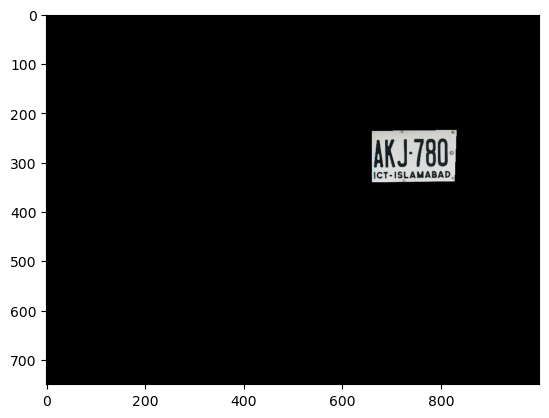

In [122]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [125]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_img=gray[x1:x2+1,y1:y2+1] 

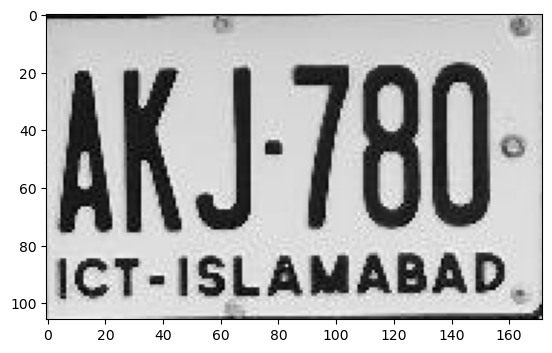

In [126]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

# 4. Easy OCR to read text

In [127]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_img)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [128]:
result

[([[0, 6], [166, 6], [166, 84], [0, 84]], 'AKJ:780', 0.44826294375843073),
 ([[0, 78], [164, 78], [164, 104], [0, 104]],
  'iCT- ISLAMABAD',
  0.572695527883321)]

Render result

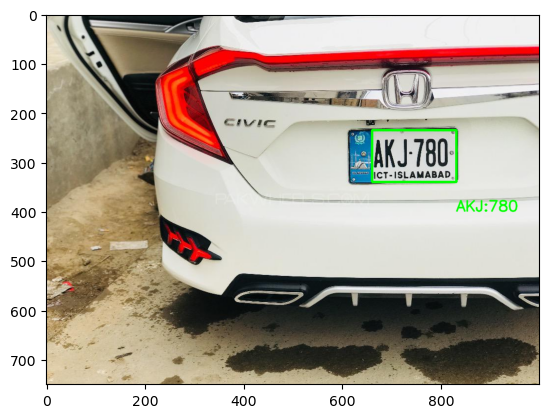

In [130]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img, text=text, org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1, color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))